# CS20B1044 DIP Assignment 7

1. Swap phase of the dog image and magnitude of the Lena image and display the output.
2. Swap phase of the Lena image and magnitude of the dog image and display the output
Solve 1 & 2 using built-in function (4 marks) and user defined function (6 marks).

<ins> Note: </ins> \
a. Write a function to implement FFT for 1D signal. \
b. Implement DFT function for an image using the “FFT for 1D” signal( derived in a) \
c. Consider the images of Lena and dog images attached. Find phase and magnitude of the dog and Lena images using the DFT function (in b).

In [15]:
# This Assignment is done by CS20B1044 Avinash R Changrani
# importing required libraries

import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

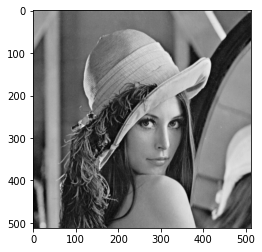

In [16]:
# load the lena image
img = cv2.imread('Lena.png')

# convert the image to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# display the image using matplotlib
plt.imshow(img, cmap='gray')
plt.show()

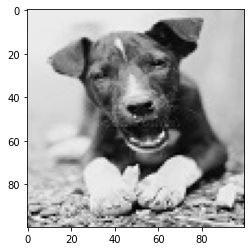

In [17]:
# load the dog image
img2 = cv2.imread('dog.jpg')

# convert the image to grayscale
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# display the image using matplotlib
plt.imshow(img2, cmap='gray')
plt.show()

In [18]:
print("Lena image shape: ", img.shape)
print("Dog image shape: ", img2.shape)

Lena image shape:  (512, 512)
Dog image shape:  (100, 100)


In [19]:
# resize the dog image to the same size as the lena image
img2 = cv2.resize(img2, (img.shape[1], img.shape[0]))

In [20]:
# inbuilt fft function
def fft_inbuilt(signal):
    return np.fft.fft(signal)

# user defined fft function (recursive using Cooley-Tukey algorithm)
def fft_userdefined(signal):
    n = len(signal)
    # Compute FFT recursively
    if n == 1:
        return signal
    else:
        x_even = fft_userdefined(signal[::2])
        x_odd = fft_userdefined(signal[1::2])
        factor = np.exp(-2j * np.pi * np.arange(n) / n)
        return np.concatenate([x_even + factor[:int(n/2)] * x_odd,
                               x_even + factor[int(n/2):] * x_odd])

# inbuilt dft function
def dft_inbuilt(image):
    # Compute DFT of rows
    dft_rows = np.apply_along_axis(np.fft.fft, 1, image)
    
    # Compute DFT of columns
    dft_cols = np.apply_along_axis(np.fft.fft, 0, dft_rows)
    # Shift the zero-frequency component to the center of the spectrum
    #dft_cols = np.fft.fftshift(dft_cols)
    return dft_cols

# user defined dft function
def dft_userdefined(image):
     # Compute 2D DFT of an image using 1D FFT
    M, N = image.shape
    dft = np.zeros((M, N), dtype=np.complex128)
    for i in range(M):
        dft[i, :] = fft_userdefined(image[i, :])
    for j in range(N):
        dft[:, j] = fft_userdefined(dft[:, j])
    # Shift the zero-frequency component to the center of the spectrum
    #dft = np.fft.fftshift(dft)
    return dft

# inbuilt function to compute magnitude and phase
def magnitude_and_phase_inbuilt(image):
    # Compute DFT of image
    dft_result = dft_inbuilt(image)
    
    # Compute magnitude and phase
    magnitude = np.abs(dft_result)
    phase = np.angle(dft_result)
    
    return magnitude, phase

# user defined function to compute magnitude and phase
def magnitude_and_phase_userdefined(image):
    # Compute DFT of image
    dft_result = dft_userdefined(image)
    
    # Compute magnitude and phase
    magnitude = np.abs(dft_result)
    phase = np.angle(dft_result)
    
    return magnitude, phase

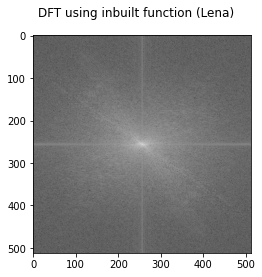

In [21]:
# perform dft using inbuilt function and display the image
dft_result_inbuilt = dft_inbuilt(img)

# Display DFT result
plt.imshow(np.log(abs(np.fft.fftshift(dft_result_inbuilt))), cmap='gray')
plt.suptitle('DFT using inbuilt function (Lena)')
plt.show()

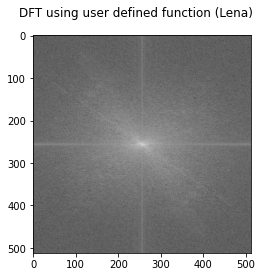

In [22]:
# perform dft using user defined function and display the image
dft_result_userdefined = dft_userdefined(img)

# Display DFT result
plt.imshow(np.log(abs(np.fft.fftshift(dft_result_userdefined))), cmap='gray')
plt.suptitle('DFT using user defined function (Lena)')
plt.show()

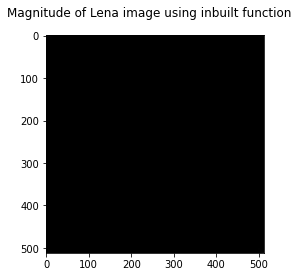

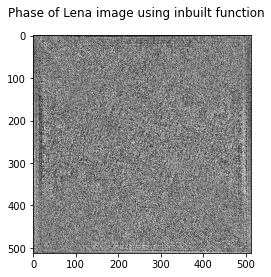

In [23]:
# use the inbuilt function to find manitude and phase of the image
magnitude_lena_inbuilt, phase_lena_inbuilt = magnitude_and_phase_inbuilt(img)

# display the magnitude and phase of the image
plt.imshow(magnitude_lena_inbuilt, cmap='gray')
plt.suptitle('Magnitude of Lena image using inbuilt function')
plt.show()

plt.imshow(phase_lena_inbuilt, cmap='gray')
plt.suptitle('Phase of Lena image using inbuilt function')
plt.show()

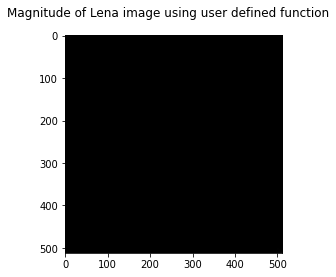

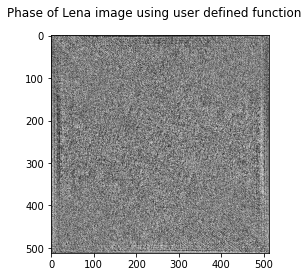

In [24]:
# use the user defined function to find manitude and phase of the image
magnitude_lena_userdefined, phase_lena_userdefined = magnitude_and_phase_userdefined(img)
# display the magnitude and phase of the image

plt.imshow(magnitude_lena_userdefined, cmap='gray')
plt.suptitle('Magnitude of Lena image using user defined function')
plt.show()

plt.imshow(phase_lena_userdefined, cmap='gray')
plt.suptitle('Phase of Lena image using user defined function')
plt.show()

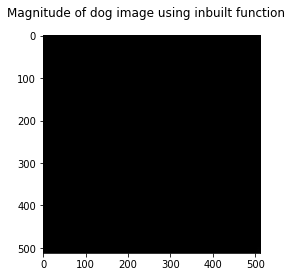

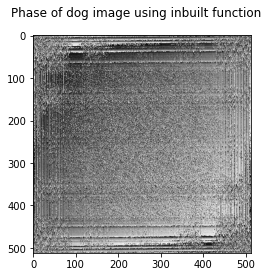

In [25]:
# perform dft using inbuilt function and display the image
magnitude_dog_inbuilt, phase_dog_inbuilt = magnitude_and_phase_inbuilt(img2)
# display the magnitude and phase of the image

plt.imshow(magnitude_dog_inbuilt, cmap='gray')
plt.suptitle("Magnitude of dog image using inbuilt function")
plt.show()

plt.imshow(phase_dog_inbuilt, cmap='gray')
plt.suptitle("Phase of dog image using inbuilt function")
plt.show()

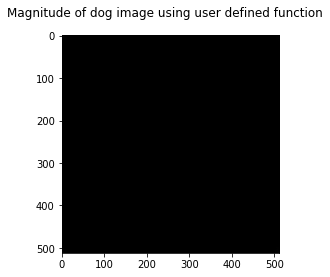

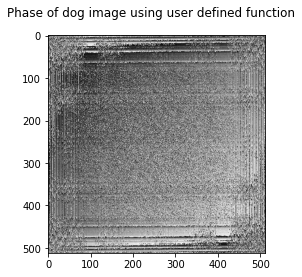

In [26]:
# perform dft using user defined function and display the image
magnitude_dog_userdefined, phase_dog_userdefined = magnitude_and_phase_userdefined(img2)

# display the magnitude and phase of the image
plt.imshow(magnitude_dog_userdefined, cmap='gray')
plt.suptitle("Magnitude of dog image using user defined function")
plt.show()

plt.imshow(phase_dog_userdefined, cmap='gray')
plt.suptitle("Phase of dog image using user defined function")
plt.show()

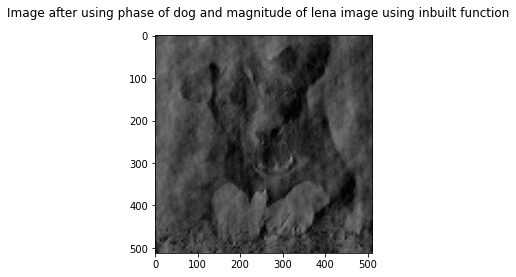

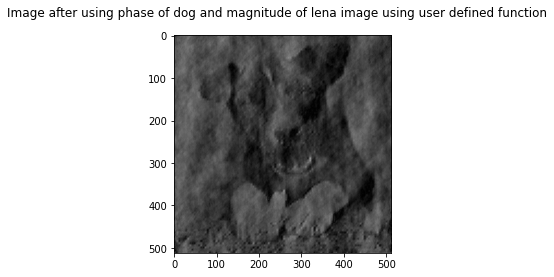

In [27]:
# Use phase of dog image and magnitude of lena image
new_img_inbuilt = magnitude_lena_inbuilt * np.exp(1j * phase_dog_inbuilt)

new_img_inbuilt = np.fft.ifft2(new_img_inbuilt)

# Display the image
plt.imshow(abs(new_img_inbuilt), cmap= 'gray')
plt.suptitle('Image after using phase of dog and magnitude of lena image using inbuilt function') 
plt.show()

# Use phase of dog image and magnitude of lena image

new_img_userdefined = magnitude_lena_userdefined * np.exp(1j * phase_dog_userdefined)

new_img_userdefined = np.fft.ifft2(new_img_userdefined)

# Display the image
plt.imshow(abs(new_img_userdefined), cmap='gray')
plt.suptitle('Image after using phase of dog and magnitude of lena image using user defined function')
plt.show()

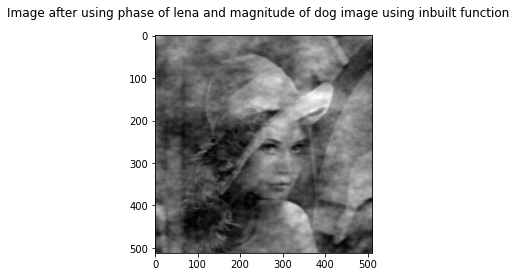

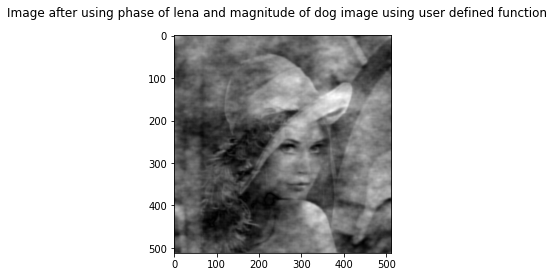

In [28]:
# use the phase of lena image and magnitude of dog image
new_img_inbuilt = magnitude_dog_inbuilt * np.exp(1j * phase_lena_inbuilt)

new_img_inbuilt = np.fft.ifft2(new_img_inbuilt)

# Display the image
plt.imshow(abs(new_img_inbuilt), cmap='gray')
plt.suptitle('Image after using phase of lena and magnitude of dog image using inbuilt function')
plt.show()

# use the phase of lena image and magnitude of dog image
new_img_userdefined = magnitude_dog_userdefined * np.exp(1j * phase_lena_userdefined)

new_img_userdefined = np.fft.ifft2(new_img_userdefined)

# Display the image
plt.imshow(abs(new_img_userdefined), cmap='gray')
plt.suptitle('Image after using phase of lena and magnitude of dog image using user defined function')
plt.show()

## Conclusions:  
1. Swapping the phase of two images can mix high-frequency and low-frequency information, leading to distorted or blurry resulting images.
2. The phase information of an image has a significant impact on its appearance, and swapping the phase can result in a completely different-looking image.
3. The magnitude spectrum of the resulting images will be the same as that of the original images.
4. The resulting images may not be that identical to the original images.